#  Data Analytics Assignment (Part B)
## gxnj57 (001110537)

In [2]:
import pandas as pd
import numpy as np

# Loading the provided Excel file

df_19 = pd.read_excel('EconomicIndicators2019.xlsx')

# Initial examination of the dataset in order  to understand its structure and identify cleaning needs

dataset_info=df_19.info()
dataset_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [3]:
#To check unique values for the continent column
unique_counts = df_19.nunique()
print(unique_counts)


No            177
Country       177
Continent      12
LifeExpect    177
GDPPC         177
MfgMn$        177
AgriMn$       177
CO2kt         167
HealthPC$     164
Pop_mn        165
dtype: int64


# Data Cleaning (EconomicIndicators2019.xlsx)
# (2-1)

In [4]:
#To identify which all columns have missing/null values

dataset_is_null = df_19.isnull().sum()
dataset_is_null




No             0
Country        0
Continent      0
LifeExpect     0
GDPPC          0
MfgMn$         0
AgriMn$        0
CO2kt         10
HealthPC$     13
Pop_mn         0
dtype: int64

In [5]:
# First step is to correct the spelling mistakes identified in the 'Continent' column

df_19['Continent'] = df_19['Continent'].replace('Afric','Africa')
df_19['Continent'] = df_19['Continent'].replace('Asi','Asia')
df_19['Continent'] = df_19['Continent'].replace('ASIA','Asia')
df_19['Continent'] = df_19['Continent'].replace('Euro','Europe')
df_19['Continent'] = df_19['Continent'].replace('EuRope','Europe')
df_19['Continent'] = df_19['Continent'].replace('N America','North America')



df_19

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,63.565,500.522981,1331.48,4872.44,11238.83,74.234104,37.77
1,2,Albania,Europe,79.282,5396.214227,963.57,2832.29,4993.30,NaN,2.85
2,3,Algeria,Africa,76.474,4021.983608,40980.38,21189.60,170582.40,250.560776,42.71
3,4,Angola,Africa,62.448,2142.238757,4253.81,5463.38,24382.90,69.379341,32.35
4,5,Antigua and Barbuda,North America,78.691,18187.779712,37.48,29.25,509.00,801.543823,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,71.344,1795.201768,10575.35,14698.22,117687.80,98.587418,33.58
173,174,Vietnam,Asia,74.093,3491.091279,79534.52,39403.36,341716.80,173.650452,95.78
174,175,West Bank and Gaza,Asia,75.241,3656.858271,1924.90,1208.60,NaN,NaN,4.69
175,176,Zambia,Africa,62.793,1268.120941,1582.41,666.81,7615.70,67.457771,18.38


In [6]:
# 2nd step, CO2kt and HealthPC$ have missing values. Need to fill them up using the fillna()

# Replace missing values in 'CO2kt' with its median
df_19['CO2kt'] = df_19['CO2kt'].fillna(df_19['CO2kt'].median())

# Replace missing values in 'HealthPC$' with its median
df_19['HealthPC$'] = df_19['HealthPC$'].fillna(df_19['HealthPC$'].median())

df_19

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,63.565,500.522981,1331.48,4872.44,11238.83,74.234104,37.77
1,2,Albania,Europe,79.282,5396.214227,963.57,2832.29,4993.30,393.829422,2.85
2,3,Algeria,Africa,76.474,4021.983608,40980.38,21189.60,170582.40,250.560776,42.71
3,4,Angola,Africa,62.448,2142.238757,4253.81,5463.38,24382.90,69.379341,32.35
4,5,Antigua and Barbuda,North America,78.691,18187.779712,37.48,29.25,509.00,801.543823,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,71.344,1795.201768,10575.35,14698.22,117687.80,98.587418,33.58
173,174,Vietnam,Asia,74.093,3491.091279,79534.52,39403.36,341716.80,173.650452,95.78
174,175,West Bank and Gaza,Asia,75.241,3656.858271,1924.90,1208.60,14960.80,393.829422,4.69
175,176,Zambia,Africa,62.793,1268.120941,1582.41,666.81,7615.70,67.457771,18.38


In [72]:
# For my reference
df_19.to_excel('EconomicIndicators2019_cleaned.xlsx', index=False)


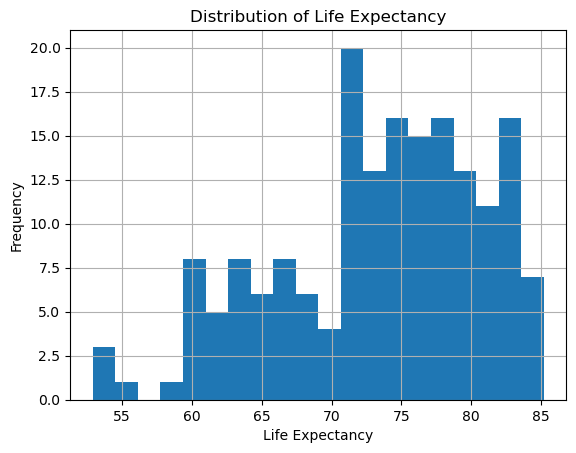

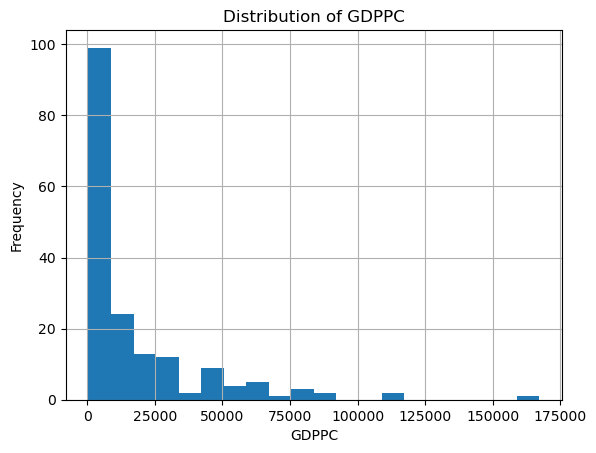

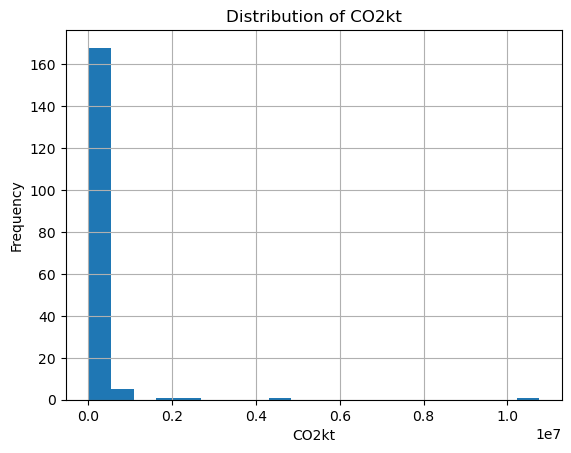

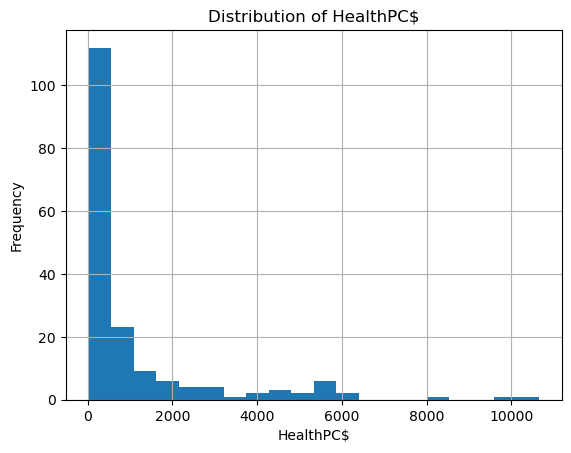

In [7]:
# Checking the distribution of the columns accross the dataset

import matplotlib.pyplot as plt



# Plot histograms for each numerical column and check distribution

plt.figure()
df_19['LifeExpect'].hist(bins=20)
plt.title(f'Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')



plt.figure()
df_19['GDPPC'].hist(bins=20)
plt.title(f'Distribution of GDPPC')
plt.xlabel('GDPPC')
plt.ylabel('Frequency')



plt.figure()
df_19['CO2kt'].hist(bins=20)
plt.title(f'Distribution of CO2kt')
plt.xlabel('CO2kt')
plt.ylabel('Frequency')



plt.figure()
df_19['HealthPC$'].hist(bins=20)
plt.title(f'Distribution of HealthPC$')
plt.xlabel('HealthPC$')
plt.ylabel('Frequency')



plt.show()

### From the graphs above, it can be seen that the columns in the dataset do not follow a normal distribution and hence median is being used instead of mean to fill up the missing/null values. The distribution is not symmetric and hence median is used as this ensures that the imputed values do not distort the original data distribution.


# Data Cleaning (EconomicIndicators2020.xlsx)


In [8]:

# Load the provided Excel file for 2020

df_20 = pd.read_excel('EconomicIndicators2020.xlsx')

# Initial examination of the data in order to understand its structure and identify cleaning needs

dataset_info=df_20.info()
dataset_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [9]:
#To check unique values for the continent column
unique_counts = df_19.nunique()
print(unique_counts)

No            177
Country       177
Continent       6
LifeExpect    177
GDPPC         177
MfgMn$        177
AgriMn$       177
CO2kt         167
HealthPC$     165
Pop_mn        165
dtype: int64


In [10]:
#To identify which all columns have missing/null values

dataset_is_null = df_20.isnull().sum()
dataset_is_null


No             0
Country        0
Continent      0
LifeExpect     0
GDPPC          0
MfgMn$         0
AgriMn$        0
CO2kt         10
HealthPC$     13
Pop_mn         0
dtype: int64

In [11]:
# CO2kt and HealthPC$ have missing values. Need to fill them up using the fillna()

# Replace missing values in 'CO2kt' with its median
df_20['CO2kt'] = df_20['CO2kt'].fillna(df_20['CO2kt'].median())

# Replace missing values in 'HealthPC$' with its median
df_20['HealthPC$'] = df_20['HealthPC$'].fillna(df_20['HealthPC$'].median())

df_20

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.290,38.97
1,2,Albania,Europe,76.99,5343.04,933.42,2915.07,4383.20,391.895,2.84
2,3,Algeria,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.850,43.45
3,4,Angola,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.740,33.43
4,5,Antigua and Barbuda,North America,78.84,15284.77,29.88,30.34,474.60,830.340,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,70.33,1759.31,11541.68,14968.15,115577.80,120.500,34.23
173,174,Vietnam,Asia,75.38,3586.35,83004.91,43865.60,355323.10,166.230,96.65
174,175,West Bank and Gaza,Asia,74.40,3233.57,1715.80,1103.00,14949.20,391.895,4.80
175,176,Zambia,Africa,62.38,956.83,1397.30,539.17,7607.10,53.750,18.93


In [12]:
#Checking if any null/missing values are still there after imputing missing values

dataset_is_null = df_20.isnull().sum()
dataset_is_null

No            0
Country       0
Continent     0
LifeExpect    0
GDPPC         0
MfgMn$        0
AgriMn$       0
CO2kt         0
HealthPC$     0
Pop_mn        0
dtype: int64

In [22]:
# For my reference
df_20.to_excel('EconomicIndicators2020_cleaned.xlsx', index=False)

# Combining both the datasets (2019 and 2020)


In [13]:

# Add a 'Year' column to each dataset to differentiate the data by year
df_19['Year'] = 2019
df_20['Year'] = 2020

# Combine the datasets using the concat method
combined_data = pd.concat([df_19, df_20], ignore_index=False)

# Save the combined dataset to a new file for further analysis
combined_data.to_excel('EconomicIndicators_combined.xlsx', index=False)

# Displaying the first few rows of the combined dataset
print(combined_data.head())

   No              Country      Continent  LifeExpect         GDPPC    MfgMn$  \
0   1          Afghanistan           Asia      63.565    500.522981   1331.48   
1   2              Albania         Europe      79.282   5396.214227    963.57   
2   3              Algeria         Africa      76.474   4021.983608  40980.38   
3   4               Angola         Africa      62.448   2142.238757   4253.81   
4   5  Antigua and Barbuda  North America      78.691  18187.779712     37.48   

    AgriMn$      CO2kt   HealthPC$  Pop_mn  Year  
0   4872.44   11238.83   74.234104   37.77  2019  
1   2832.29    4993.30  393.829422    2.85  2019  
2  21189.60  170582.40  250.560776   42.71  2019  
3   5463.38   24382.90   69.379341   32.35  2019  
4     29.25     509.00  801.543823    0.09  2019  


In [27]:
# To check if dataset looks good to continue analysis
combined_data.to_excel('combined_data.xlsx')

# Comparison of Economic Indicators (2019 vs 2020)
# (2-2)

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


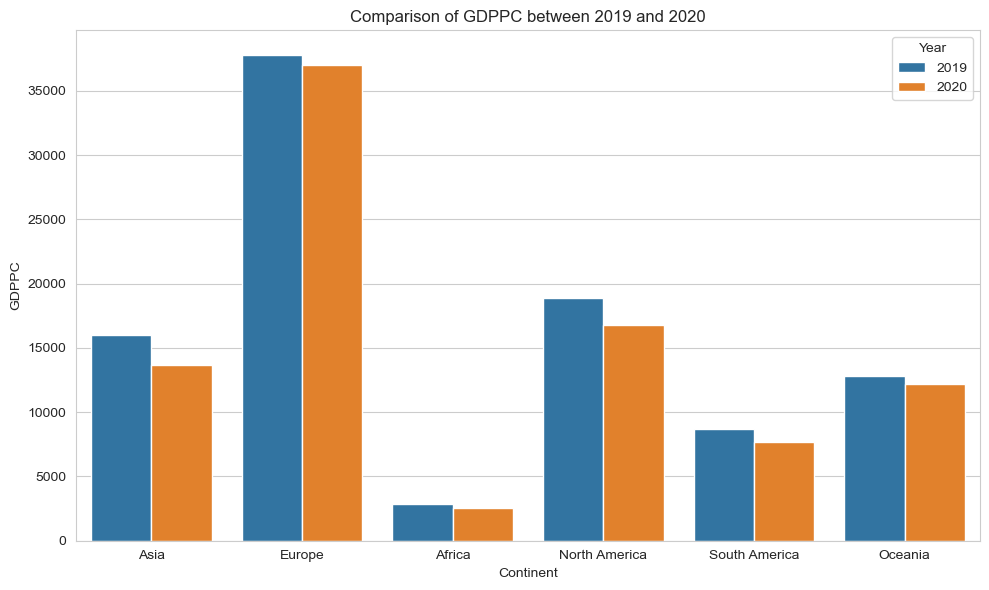

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


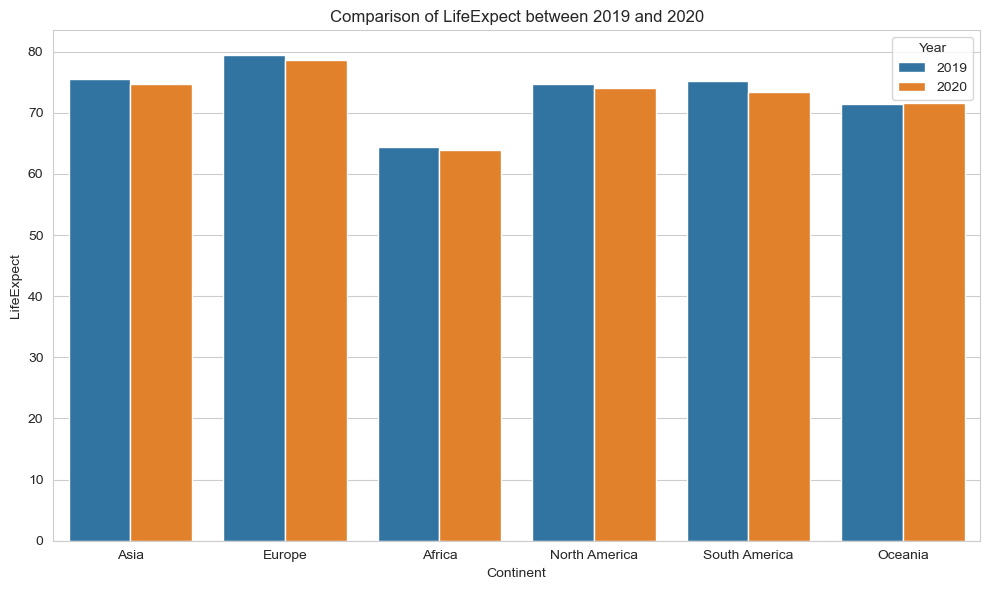

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


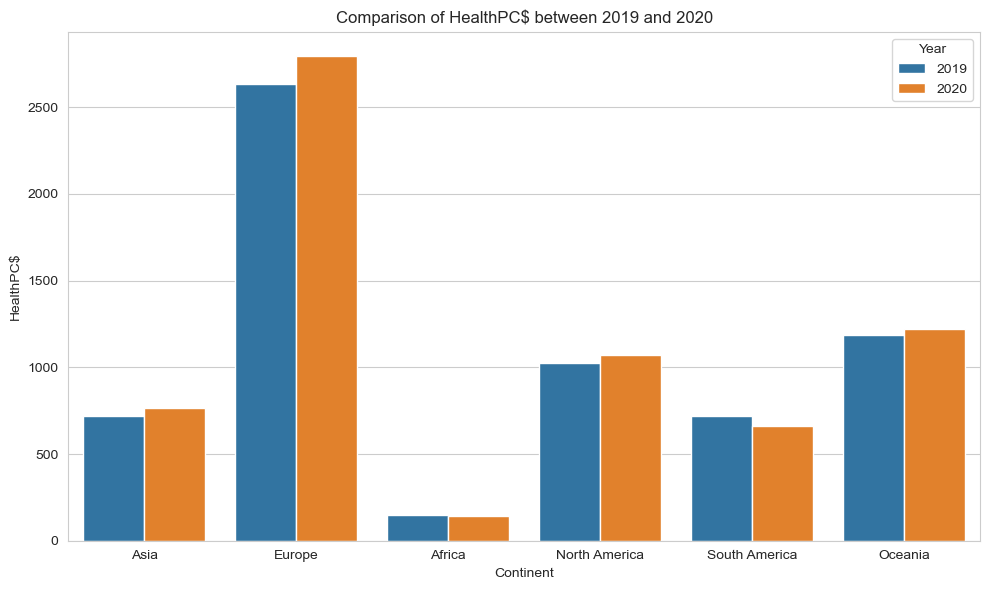

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


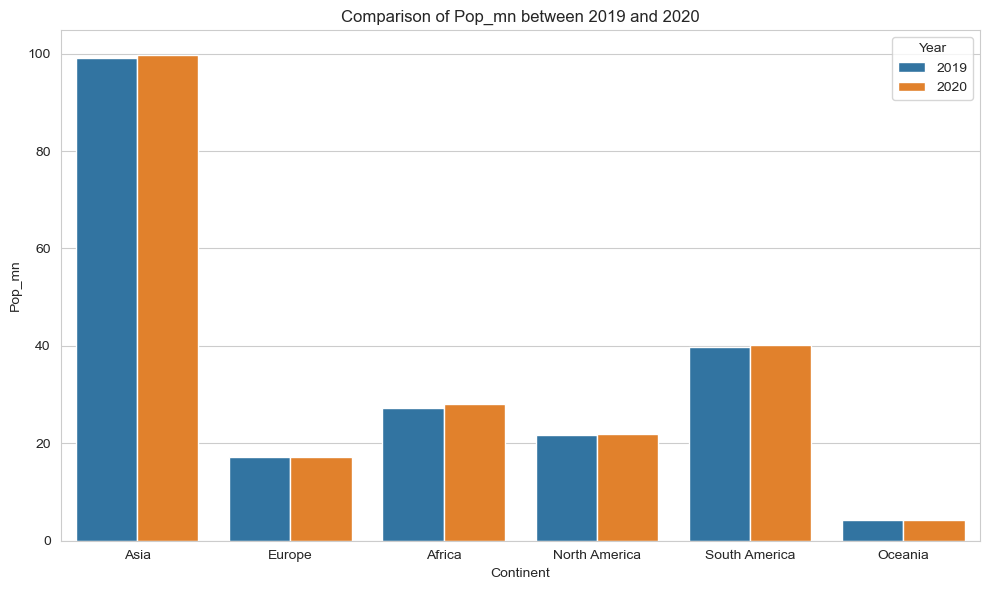

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


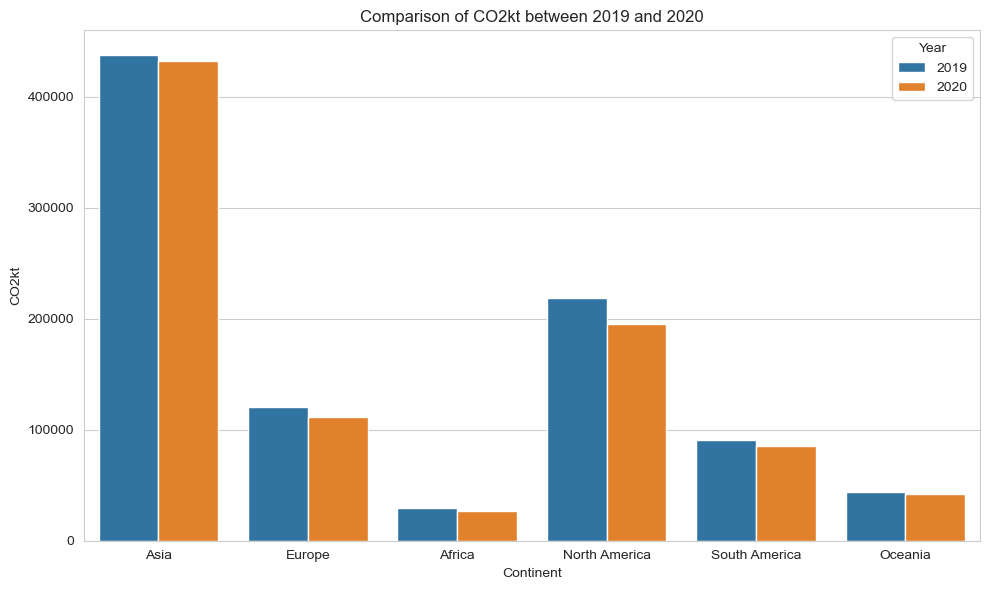

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


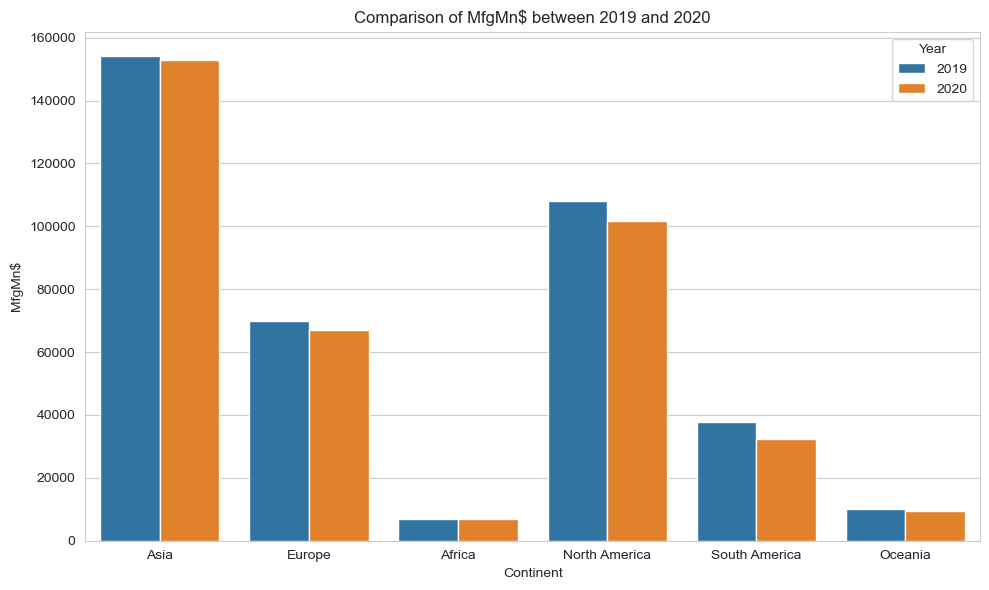

C:\Users\syeda\AppData\Local\Temp\ipykernel_4388\3894164758.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)


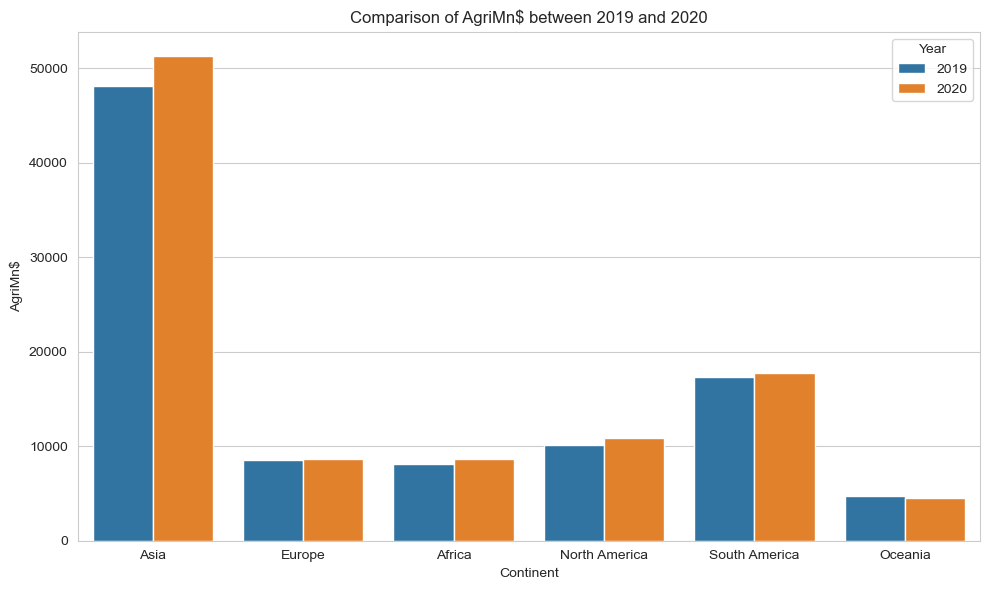

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# generating a comparison plot for each economic indicator 

# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# List of economic indicators to compare
indicators = ['GDPPC', 'LifeExpect', 'HealthPC$','Pop_mn', 'CO2kt', 'MfgMn$','AgriMn$']

# Generating comparison plots using a for loop
for indicator in indicators:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=combined_data, x='Continent', y=indicator, hue='Year', ci=None)
    plt.title(f'Comparison of {indicator} between 2019 and 2020')
    plt.xlabel('Continent')
    plt.ylabel(indicator)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.savefig(f'{indicator}_comparison.png')  # Saving the plot as a PNG file
    plt.show()


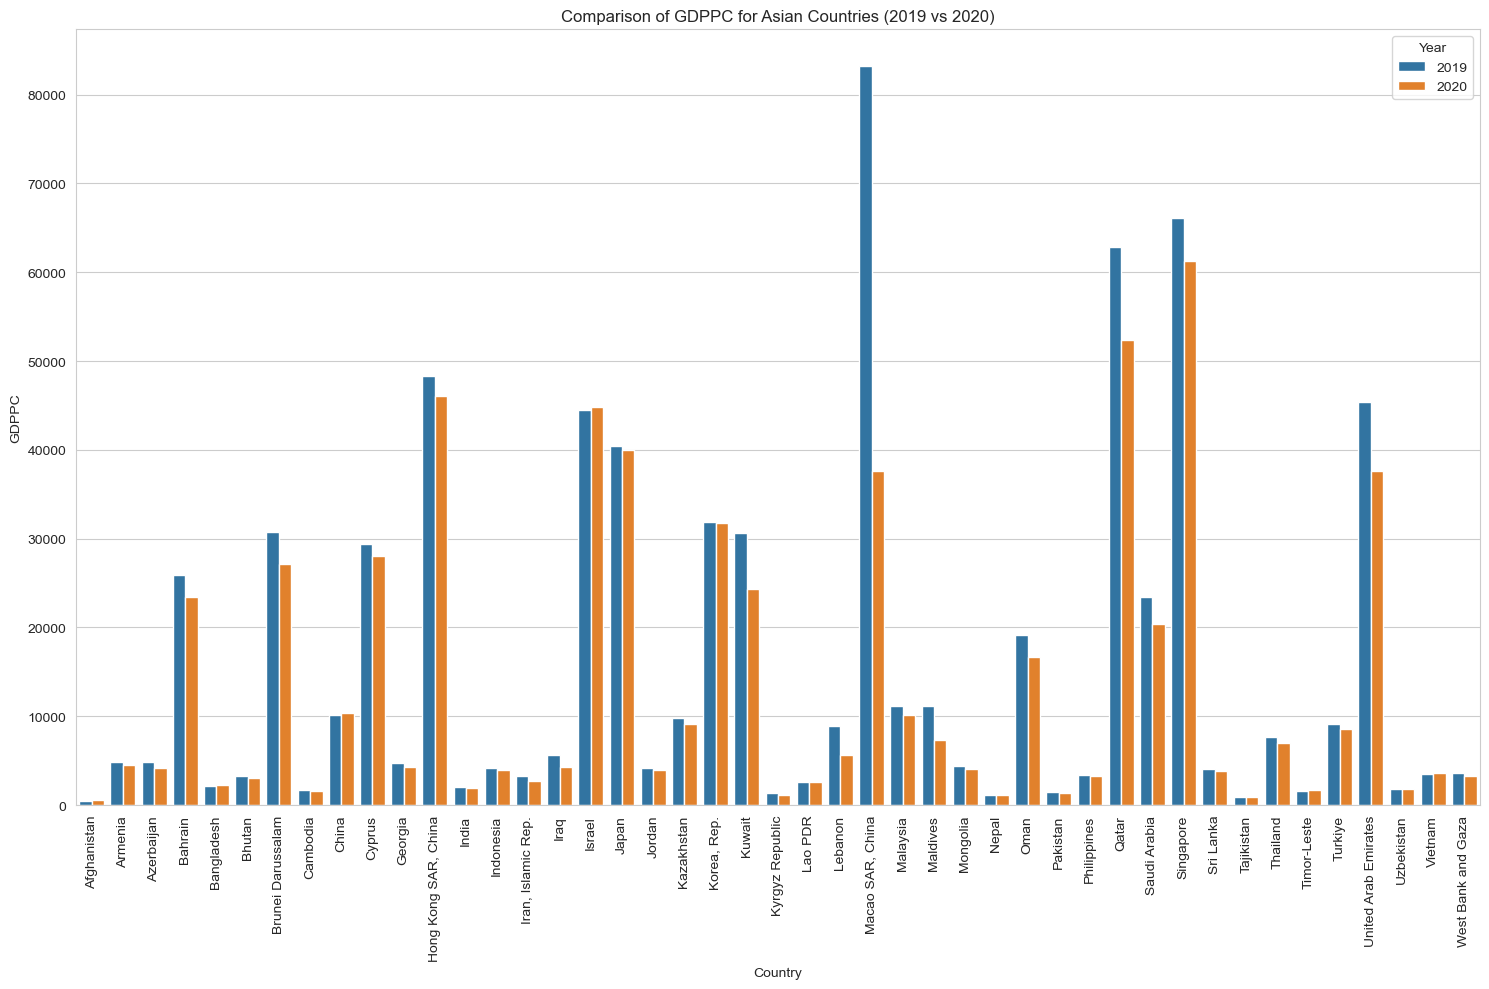

In [15]:
#Since gdp decreases for asia the most, I am comparing the variation of GDPPC for all asian countries



# Filter the data to include only Asian countries
asian_countries_data = combined_data[combined_data['Continent'] == 'Asia']

# Creating a bar plot to compare the GDPPC of Asian countries
plt.figure(figsize=(15, 10))  
sns.barplot(data=asian_countries_data, x='Country', y='GDPPC', hue='Year')
plt.xticks(rotation=90)  # Rotating the country names for better readability
plt.title('Comparison of GDPPC for Asian Countries (2019 vs 2020)')
plt.xlabel('Country')
plt.ylabel('GDPPC')
plt.legend(title='Year')
plt.tight_layout()
plt.show()
